In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

<h3>Task 1</h3>

In [4]:
gun = pd.read_csv("/Users/herrakaava/Documents/school/sekamallit/week_3/Gun.csv", index_col=0)

Gun-aineisto sisältää kokeen tulokset, jossa verrattiin kahta eri tapaa (*Method*) ampua tykillä. Testaajina toimi 9 eri ryhmää (*Team*), joista jokainen yksittäinen ryhmä sisälsi ruumiinrakenteeltaan (*Physique*) samankaltaisia jäseniä. Kukin ryhmä testasi molempia ampumatapoja kahdesti. Vasteena on laukausten määrä minuutissa (*rounds*).

Tutkimuskysymyksinä ovat:

- Onko ampumistavoissa eroa?
- Onko ryhmän ruumiinrakenteella merkitystä ampumisnopeuteen?

Testiin valikoituneet ryhmät eivät ole itsessään mielenkiintoisia, eli mallinnetaan ryhmän vaikutusta satunnaistekijällä. Otetaan kiinteiksi vaikutuksiksi ampumatapa sekä ruumiinrakennee. Yksinkertaisuuden vuoksi otetaan malliin mukaan vain päävaikutuksia.

In [5]:
gun.head()

,rounds,Method,Team,Physique
1,20.2,M1,T1S,Slight
2,14.2,M2,T1S,Slight
3,22.0,M1,T1A,Average
4,14.1,M2,T1A,Average
5,23.1,M1,T1H,Heavy


In [6]:
gun.shape

(36, 4)

In [7]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 36
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rounds    36 non-null     float64
 1   Method    36 non-null     object 
 2   Team      36 non-null     object 
 3   Physique  36 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.4+ KB


In [8]:
# Range of the response
print(f"[{np.min(gun["rounds"])}, {np.max(gun["rounds"])}]")

[12.2, 26.9]


In [22]:
def unique_groups(data):
    print(f"Unique groups of 'Methods': {list(gun["Method"].unique())}")
    print(f"Unique groups of 'Teams': {list(gun["Team"].unique())}")
    print(f"Unique groups of 'Physique': {list(gun["Physique"].unique())}")

In [23]:
unique_groups(gun)

Unique groups of 'Methods': ['M1', 'M2']
Unique groups of 'Teams': ['T1S', 'T1A', 'T1H', 'T2S', 'T2A', 'T2H', 'T3S', 'T3A', 'T3H']
Unique groups of 'Physique': ['Slight', 'Average', 'Heavy']


<h3>Visuals</h3>

In [58]:
def violin(data):
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    sns.violinplot(x="Method", y="rounds", hue="Physique", data=data, zorder=2)
    plt.grid(True, zorder=1, alpha=0.5)

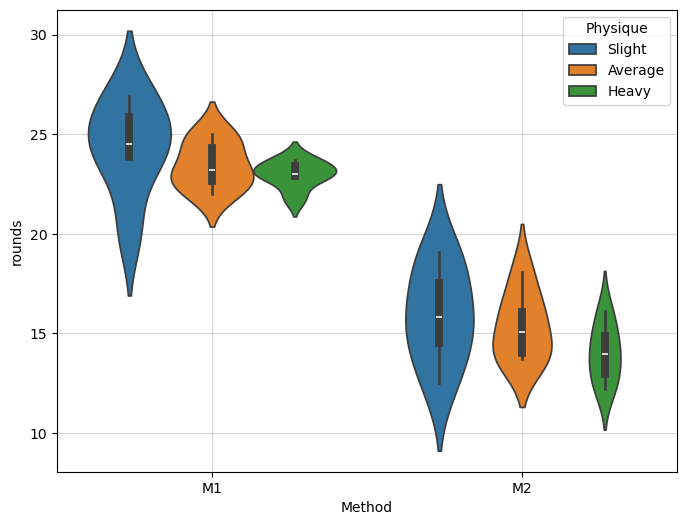

In [59]:
violin(gun)

In [60]:
def box(data):
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    sns.boxplot(x="Method", y="rounds", hue="Physique", data=data, zorder=2)
    plt.grid(True, zorder=1, alpha=0.5)

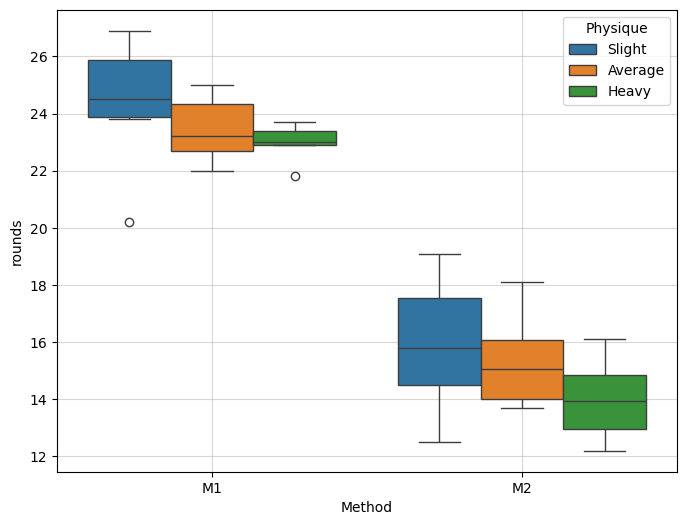

In [61]:
box(gun)

<h3>Model equation</h3>

Let's write the model equation for the response $\, \large y_{ijkl}, \,$ where $\, \text{i}=1,2,3 \,$ and $\, \text{j}=\text{S, A, H} \,$ together index the groups, $\, \text{k}=1,2 \,$ indexes the Method, and $\, l=1,2 \,$ indexes the repetitions (of the different shooting Methods).

\begin{equation*}
    \large y_{ijkl} = \mu \, + \, \beta_{1k} \, + \, \beta_{2j} \, + \, b_{ij} \, + \, \epsilon_{ijkl},
\end{equation*}

where

- $\mu \,$ is the average rounds per minute (chosen from a random team, with a random physique, with a random method and from a random repetition).

- $\beta_{1k} \,$ is the fixed effect for the *k*th method.

- $\beta_{2j} \,$ is the fixed effect for *j*th physique.

- $b_{ij} \sim N(0, \tau^2) \,$ is the random effect for the *ij*th team. The teams are modeled as random effects, meaning that we are interested in capturing the variability between different teams but not estiating specific differences between individual teams.

- $\epsilon_{ijkl} \sim N(0, \sigma^2) \,$ is the residual error containing the within-team variation not explained by the fixed effect or the random effects.

- The random variables $\, b_{ij} \,$ and $\, \epsilon_{ijk} \,$ are assumed to be independent of each other.

<h3>Task 3</h3>

In [2]:
df = pd.read_csv("/Users/herrakaava/Documents/school/sekamallit/week_3/Machines.csv", index_col=0)

- Tietyn tehtaan työntekijöistä (*Worker*) valittiin satunnaisesti kuusi.
- Kukin työntekijä suoritti tietyn työtehtävän kolmella eri koneella (*Machine*) (*A, B, C*) tehden kolme toistoa kullakin.
- Joka suorituskerralta mitattiin "tuottavuuspistemäärä" (*score*).

In [3]:
df.head()

,Worker,Machine,score
1,1,A,52.0
2,1,A,52.8
3,1,A,53.1
4,2,A,51.8
5,2,A,52.8


In [4]:
df.shape

(54, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1 to 54
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Worker   54 non-null     int64  
 1   Machine  54 non-null     object 
 2   score    54 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [6]:
# The range of the response
print(f"[{np.min(df["score"])}, {np.max(df["score"])}]")

[43.0, 72.1]


In [7]:
# Unique workers
list(df["Worker"].unique())

[1, 2, 3, 4, 5, 6]

In [8]:
# Unique machines
list(df["Machine"].unique())

['A', 'B', 'C']

In [9]:
df.groupby(["Worker", "Machine"]).count()

score
Worker Machine       
1      A            3
       B            3
       C            3
2      A            3
       B            3
       C            3
3      A            3
       B            3
       C            3
4      A            3
       B            3
       C            3
5      A            3
       B            3
       C            3
6      A            3
       B            3
       C            3

In [10]:
# Avg score per worker per machine
avg_scores = df.groupby(["Worker", "Machine"]).mean()
avg_scores

score
Worker Machine           
1      A        52.633333
       B        62.900000
       C        67.200000
2      A        52.566667
       B        59.566667
       C        61.833333
3      A        59.533333
       B        68.033333
       C        70.800000
4      A        51.233333
       B        62.733333
       C        64.766667
5      A        51.366667
       B        65.066667
       C        71.733333
6      A        46.800000
       B        43.633333
       C        61.300000

<h3>Visuals</h3>

In [35]:
def visualize_performance(data):
    """
    Notes:
    - Tuples are used to specify multiple values that together uniquely identify
      a specific row in a multi-level index (see df.loc)
    """
    # Color palette 
    palette = sns.color_palette(palette="colorblind", n_colors=len(data["Worker"].unique()))
    worker_colors = {worker: palette[i] for i, worker in enumerate(data["Worker"].unique())}
    
    # Avg score per worker per machine
    avg_scores = data.groupby(["Worker", "Machine"]).mean()
    
    ##### The main graph #####
    plt.figure(figsize=(6,8), dpi=100)
    sns.scatterplot(x="Machine",
                    y="score",
                    hue="Worker",
                    palette="colorblind",
                    zorder=2,
                    data=data)
    
    ##### plotting the avg scores per worker per machine #####
    for worker in avg_scores.index.levels[0]:
        # Save the mean values to connect them with a lineplot
        mean_vals = []
        for machine in avg_scores.index.levels[1]:
            mean_val = avg_scores.loc[(worker, machine), "score"]
            mean_vals.append(mean_val)
            plt.scatter(machine, 
                        mean_val, 
                        color=worker_colors[worker], 
                        s=1)
    
        ##### Plot the line plot connecting the avg values
        plt.plot(data["Machine"].unique(), mean_vals, linestyle="--", linewidth=1)
    
    # blääblää
    plt.grid(True, zorder=1, alpha=0.5)
    plt.legend(title="Worker", bbox_to_anchor=(1.03, 0.6), loc="upper left")

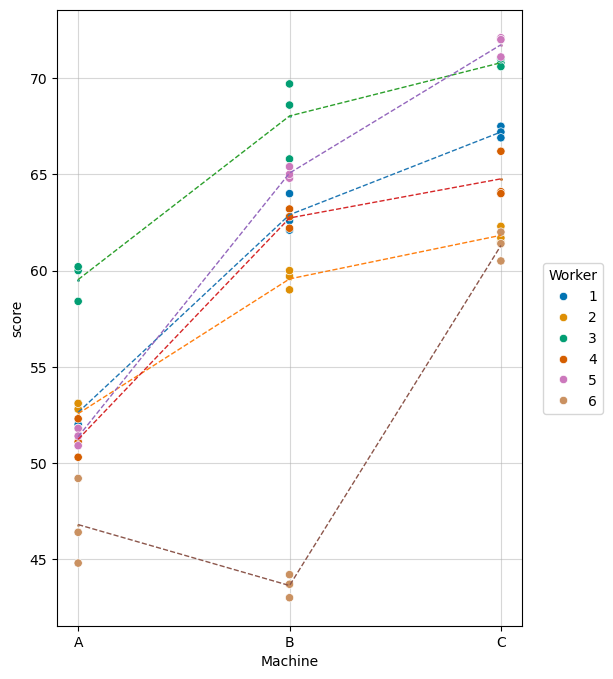

In [36]:
visualize_performance(df)

<h3>Fitting</h3>

In [13]:
def mixed_effects_model(data):
    model = smf.mixedlm("score ~ Machine",
                        groups=data["Worker"],
                        re_formula="1",
                        data=data)
    fit = model.fit(reml=True)
    return model, fit

score ~ Machine
- Fixed effects

groups=data["Worker"]
- Each worker is treated as a group, and the model will estimate random intercepts for each worker

re_formula = "1" (random effects formula)
- The formula for the random effects. By specifying "1", one includes only a random intercept for each worker (each worker is allowed to have their own baseline score (i.e., intercept)).

In [14]:
model, fit = mixed_effects_model(df)

In [15]:
print(fit.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score    
No. Observations: 54      Method:             REML     
No. Groups:       6       Scale:              9.9960   
Min. group size:  9       Log-Likelihood:     -143.4391
Max. group size:  9       Converged:          Yes      
Mean group size:  9.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    52.356    2.229 23.485 0.000 47.986 56.725
Machine[T.B]  7.967    1.054  7.559 0.000  5.901 10.032
Machine[T.C] 13.917    1.054 13.205 0.000 11.851 15.982
Group Var    26.487    5.813                           



$\hat{\mu} = 52.356$
- Represents the average score for machine A (reference level) for a random worker and random round.

$\hat{\beta}_B = 7.967$
- $\hat{\mu} \, + \, \hat{\beta}_B = 60.323 \,$ represents the average score for machine B for a random worker and random round.

$\hat{\beta}_C = 13.917$
- $\hat{\mu} \, + \, \hat{\beta}_C = 66.273 \,$ represents the average score for machine C for a random worker and random round.

$\hat{\sigma} \, \, (\sqrt{\text{Scale}}) = 3.162 \,$ in the summary output
- The within-worker variation.

$\hat{\tau} \, \, (\sqrt{\text{Group Var}}) = 5.147 \,$ in the summary output

- The between-worker variation.

In [16]:
def lower_triangular_cov_mat(S):
    S_tril = pd.DataFrame(data=np.round(np.tril(S), 4),
                          index=S.index,
                          columns=S.columns)
    return S_tril

In [17]:
lower_triangular_cov_mat(fit.cov_params())

,Intercept,Machine[T.B],Machine[T.C],Group Var
Intercept,4.9698,0.0000,0.0000,0.0000
Machine[T.B],-0.5553,1.1107,0.0000,0.0000
Machine[T.C],-0.5553,0.5553,1.1107,0.0000
Group Var,-0.0000,0.0000,0.0000,3.3803


In [18]:
fit.random_effects

{1: Group    1.210357
 dtype: float64,
 2: Group   -1.594259
 dtype: float64,
 3: Group    6.211745
 dtype: float64,
 4: Group   -0.069316
 dtype: float64,
 5: Group    2.94858
 dtype: float64,
 6: Group   -8.707107
 dtype: float64}

- The random intercepts (deviations from the fixed global intercept $\, \mu$) for each worker, indicating how much each worker's baseline score differs from the fixed global intercept.
- A positive random effect means that the worker tends to score higher than the average.
- A negative random effect means that the worker tends to score lower than the average.

Let's explore if this model is ideal in the sense that if we thought that the dataset was generated from the probability distribution given by the model in question, does it generate similar patterns and scores as the original dataset.

In [28]:
def simulate_scores(data, fitted_model, rounds_per_machine):
    """
    Blääblää.
    
    Notes:
    - The residual (error term) represents the random deviation of each
      INDIVIDUAL measurement from the model's predicted value.
    - The residuals capture the variability that is not explained
      by the fixed effects or random effects, and they are INDEPENDENT
      across different observations.
    """
    # The random effect variance
    tau_sq = fitted_model.cov_re.iloc[0, 0]
    
    # The residual variance
    sigma_sq = fit.scale
    
    # Unique machines
    machines = list(data["Machine"].unique())
    
    # Unique workers
    workers = list(data["Worker"].unique())
    
    # Fixed effects for machines
    ic = fitted_model.fe_params["Intercept"]
    machine_effects = {
        "A": 0,    # Contained as the reference level in the intercept
        "B": fitted_model.fe_params["Machine[T.B]"],
        "C": fitted_model.fe_params["Machine[T.C]"]
    }
    
    ##### Simulate data #####
    simulated_scores = []
    for worker in workers:
        # Random intercept for the ith worker from N(0, tau^2)
        random_ic = np.random.normal(0, np.sqrt(tau_sq))
        # Generate simulations
        for machine in machines:
            for _ in range(rounds_per_machine):
                # Fixed effect + random (worker) effect + residual (noise)
                score = ic + random_ic + machine_effects[machine] + np.random.normal(0, np.sqrt(sigma_sq))
                simulated_scores.append(score)
    
    ##### Construct a new df with the original features and the simulated scores #####
    simulated_df = data.drop("score", axis=1)
    simulated_df["score"] = simulated_scores
    return simulated_df

In [29]:
simulated_data = simulate_scores(data=df,
                                 fitted_model=fit,
                                 rounds_per_machine=3)

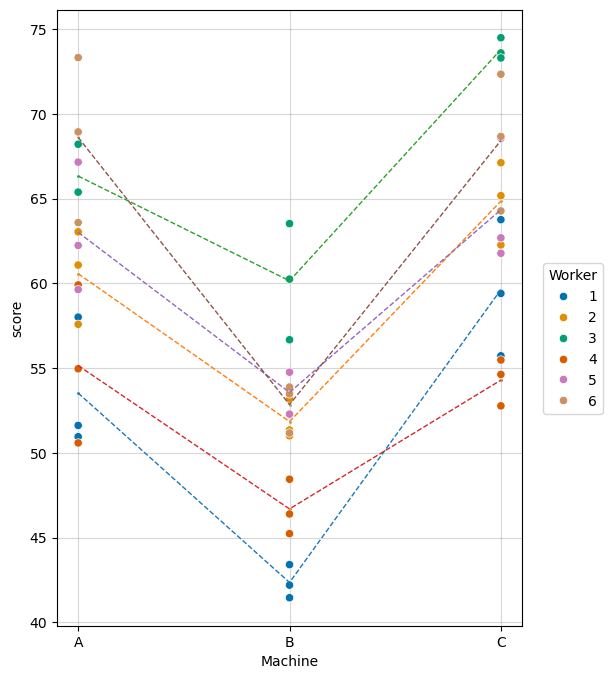

In [30]:
visualize_performance(simulated_data)

In [76]:
def compare_scores(data_original, data_simulated):
    """
    Notes:
    - In Pandas, when slicing using loc with multiple index levels, 
      you should use slice(None) to indicate that you want to select 
      all values for a specific level of the index.
    """
    avg_scores_original = data_original.groupby(["Worker", "Machine"]).mean()
    avg_scores_simulated = data_simulated.groupby(["Worker", "Machine"]).mean()
    avg_scores_original["simulated_scores"] = avg_scores_simulated["score"]
    comparison_df = avg_scores_original.copy()
    comparison_df["simulated_scores"] = avg_scores_simulated["score"]
    comparison_df["error"] = avg_scores_original["score"] - avg_scores_simulated["score"]
    return comparison_df

In [77]:
comparison_df = compare_scores(df, simulated_data)

In [78]:
comparison_df

score  simulated_scores      error
Worker Machine                                        
1      A        52.633333         53.530999  -0.897666
       B        62.900000         42.356602  20.543398
       C        67.200000         59.632800   7.567200
2      A        52.566667         60.573139  -8.006473
       B        59.566667         51.850435   7.716232
       C        61.833333         64.856396  -3.023063
3      A        59.533333         66.332976  -6.799643
       B        68.033333         60.153098   7.880235
       C        70.800000         73.797789  -2.997789
4      A        51.233333         55.154526  -3.921193
       B        62.733333         46.695484  16.037849
       C        64.766667         54.296881  10.469786
5      A        51.366667         63.011641 -11.644974
       B        65.066667         53.574000  11.492667
       C        71.733333         64.343630   7.389703
6      A        46.800000         68.617017 -21.817017
       B        43.633333         52.848627  -9.215293
       C        61.300000         68.430892  -7.130892

In [81]:
def mean_error_per_machine(data):
    for machine in data.index.levels[1]:
        mean_error = data.loc[(slice(None), machine), "error"].mean()
        print(f"The mean error for machine {machine}: {mean_error}")

In [82]:
mean_error_per_machine(comparison_df)

The mean error for machine A: -8.847827563396619
The mean error for machine B: 9.075848021926117
The mean error for machine C: 2.0458239144614865
